<a href="https://colab.research.google.com/github/abdulhirshad/First-Project/blob/master/Rasa_bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import logging, io, json, warnings
logging.basicConfig(level = 'INFO')
warnings.filterwarnings('ignore')

def pprint(o):
  print(json.dumps(o,indent =2))

In [ ]:
import sys
python = sys.executable
!{python} -m pip install -U rasa_core==0.9.6 rasa_nlu[spacy]===0.12.3;

#!{python} -m spacy download en_core_web_md
#!{python} -m spacy link en_core_web_md en --force;

Requirement already up-to-date: rasa_core==0.9.6 in /usr/local/lib/python3.6/dist-packages (0.9.6)
Requirement already up-to-date: rasa_nlu[spacy]===0.12.3 in /usr/local/lib/python3.6/dist-packages (0.12.3)


In [ ]:
!{python} -m spacy download en_core_web_md
!{python} -m spacy link en_core_web_md en --force;

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_md -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [ ]:
import rasa_nlu
import rasa_core
import spacy

print("rasa_nlu: {} rasa_core:{}".format (rasa_nlu.__version__,rasa_core.__version__))

rasa_nlu: 0.12.3 rasa_core:0.9.6


In [ ]:
nlu_md = """

## intent:greet
- hey
- hello there!!
- hi
- Hi
- hello
- Good morning
- Good evening
- hey there!!
- Good afternoon
- hey pal
- hey dude
- Dude where are you?
- wassup

## intent:affirm
- great 
- ok
- okay
- thank you
- thanks
- cheers
- thanks a lot
- thank you very much
- you are a life saver
- yes, thanks

##intent:emergency_fire
- it's urgent i need to call the [fire department](Fire) please
- we need the [fire fighter](Fire) please
- i have to call the [fire fighter](Fire) please
- can i get the [fire department](Fire) number
- the fire is triggered we need to call the [fire department](Fire) please
- fire  is spread into the rooms we need a [fire fighter](Fire)
- a fire has been exploded and we need a emergency [fire department](Fire) number
- i need the help of [fire authority](Fire) please
- i need to call the [fire department](Fire)
- we have an emergency in the house it's burning i have to contact the [fire police](Fire)

##intent:emergency_police
- i have to call the [police](Police) please
- i need to call the [khakis](Police)
- i need to call the [boys in blue](Police)eneccccfjihgerjgrhtlljnjejrtetgkbubhhluukckc

- i have to contact the [fuzz](Polce) please
- i need to reach the [law enforcement](Police) please
- i saw a murder i need to call the [police](Police)
- i have to call the [police emergency](Police) please
- can i know the [police emergency](Police) number please
- what the [police emergency](Police) number please
- i need a [policewoman](Police) please

##intent:emergency_ambulace
- i need an [ambulance](ambulance)
- what's an [emergency ambulance](ambulance) number
- call [108](ambulance)
- my friend broke her arm i need an [ambulance](ambulance)
- someone in the coffee shop fainted i need an [ambulance](ambulance)
- help me i need to call the [mobile hospital](ambulance) please
- call the nearest [paramedics department](ambulance) for the help
- people met with an accident and they are in a trauma i need an [ambulance](ambulance)
- i need a [red cross truck](ambulance)

##intent:emergency_insurance_number
- give me the [insurance](insurance) number please
- i have to call my [insurance](insurance) provider please
- give me the [health insurance number](insurance) number please
- i have to call the [insurance toll-free number](insurance)
- my leg is broken i need to call for the [allowance](insurance)
- i have a water leak at home i urgently need a [insurance number](insurnce)
- i crashed my car i need to call my [insurance people](insurance)

##intent:emergency_road_help
- i need to call the [tow truck](road_help) please
- i need to call the [wrecker](road_help) please
- i need to call the [recovery truck](road_help) please
- please provide me the number for [truck services](road_help)
- i have to contact the [break down services](road_help)
- my car is broken i need a [road service](road_help) please

## intent:fine_ask
- I am good, how are you doing?
- I'm fine, how are you?
- I'm good, how are you?

## intent:my_name_is
- I am [Atul](PERSON)
- I am [Sampriti](PERSON)
- I'm [Prerna](PERSON)
- im [Varun](PERSON)
- My name is [Nikhil](PERSON)

## intent:fine_normal
- I am doing great
- I'm doing great
- I'm fine
- I'm good

## intent:news
- Share some latest news around the [world](category)?
- Share some latest news in [sports](category)?
- What is going on in [technology](category)?
- Tell me some news about [fashion](category)
- Tell me some news about [business](category)
- Tell me some news about [arts](category)
- What is going on in [arts](category)
- What is cooking in [food](category)
- [movies](category)


## intent:thanks
- Thanks
- Thank you so much

## intent:bye
- No, I am good as of now. Bye
- Bye
- Bbye
"""

%store nlu_md > nlu.md

Writing 'nlu_md' (str) to file 'nlu.md'.


In [ ]:
config = """
language : 'en'

pipeline:
- name: "nlp_spacy"                   # loads the spacy language model
- name: "tokenizer_spacy"             # splits the sentence into tokens
- name: "ner_crf"                   # uses the pretrained spacy NER model
- name: "intent_featurizer_spacy"     # transform the sentence into a vector representation
- name: "intent_classifier_sklearn"   # uses the vector representation to classify using SVM
- name: "ner_synonyms"                # trains the synonyms
""" 

%store config > config.yml

Writing 'config' (str) to file 'config.yml'.


In [ ]:
from rasa_nlu.training_data import load_data
from rasa_nlu.config import RasaNLUModelConfig
from rasa_nlu.model import Trainer
from rasa_nlu import config

#loading the nlu training samples
training_data = load_data('nlu.md')

#trainer to educate our pipeline
trainer = Trainer(config.load('config.yml'))

#train the model
interpreter = trainer.train(training_data)

#store it for future use
model_directory = trainer.persist('./models/nlu',fixed_model_name = 'current')

INFO:rasa_nlu.training_data.loading:Training data format of nlu.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 91 (13 distinct intents)
	- Found intents: 'emergency_police', 'emergency_road_help', 'thanks', 'news', 'fine_normal', 'bye', 'my_name_is', 'emergency_ambulace', 'greet', 'affirm', 'fine_ask', 'emergency_insurance_number', 'emergency_fire'
	- entity examples: 56 (9 distinct entities)
	- found entities: 'insurance', 'category', 'Police', 'ambulance', 'insurnce', 'Polce', 'PERSON', 'Fire', 'road_help'

INFO:rasa_nlu.utils.spacy_utils:Trying to load spacy model with name 'en'
INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.model:Starting to train component nlp_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component tokenizer_spacy
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component ner_crf
INFO:r

Fitting 2 folds for each of 6 candidates, totalling 12 fits


INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Starting to train component ner_synonyms
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Successfully saved model into '/content/models/nlu/default/current'


let's check

In [ ]:
pprint(interpreter.parse('i found blood in my house can i have a police number'))

{
  "intent": {
    "name": "emergency_ambulace",
    "confidence": 0.19291723393342786
  },
  "entities": [
    {
      "start": 39,
      "end": 45,
      "value": "police",
      "entity": "Police",
      "confidence": 0.341532059178835,
      "extractor": "ner_crf"
    }
  ],
  "intent_ranking": [
    {
      "name": "emergency_ambulace",
      "confidence": 0.19291723393342786
    },
    {
      "name": "emergency_police",
      "confidence": 0.1886981907008275
    },
    {
      "name": "emergency_insurance_number",
      "confidence": 0.17807060716005702
    },
    {
      "name": "emergency_fire",
      "confidence": 0.07717712891180616
    },
    {
      "name": "emergency_road_help",
      "confidence": 0.05296476878792745
    },
    {
      "name": "bye",
      "confidence": 0.05031760114116128
    },
    {
      "name": "affirm",
      "confidence": 0.0456752572725731
    },
    {
      "name": "greet",
      "confidence": 0.045302015708156555
    },
    {
      "name": "ne

INFO:rasa_nlu.components:Added 'nlp_spacy' to component cache. Key 'nlp_spacy-en'.
INFO:rasa_nlu.training_data.loading:Training data format of nlu.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 91 (13 distinct intents)
	- Found intents: 'emergency_police', 'emergency_road_help', 'thanks', 'news', 'fine_normal', 'bye', 'my_name_is', 'emergency_ambulace', 'greet', 'affirm', 'fine_ask', 'emergency_insurance_number', 'emergency_fire'
	- entity examples: 56 (9 distinct entities)
	- found entities: 'insurance', 'category', 'Police', 'ambulance', 'insurnce', 'Polce', 'PERSON', 'Fire', 'road_help'

INFO:rasa_nlu.evaluate:Intent evaluation results:
INFO:rasa_nlu.evaluate:Intent Evaluation: Only considering those 91 examples that have a defined intent out of 91 examples
INFO:rasa_nlu.evaluate:F1-Score:  0.9564435564435565
INFO:rasa_nlu.evaluate:Precision: 0.9505494505494507
INFO:rasa_nlu.evaluate:Accuracy:  0.967032967032967
INFO:rasa_nlu.evaluate:Cl

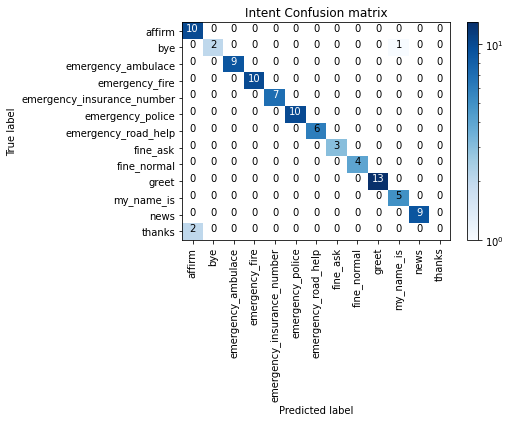

INFO:rasa_nlu.evaluate:Entity evaluation results:
INFO:rasa_nlu.evaluate:Evaluation for entity extractor: ner_crf 
INFO:rasa_nlu.evaluate:F1-Score:  0.9275355857105012
INFO:rasa_nlu.evaluate:Precision: 0.9312538268247493
INFO:rasa_nlu.evaluate:Accuracy:  0.9382022471910112
INFO:rasa_nlu.evaluate:Classification report: 
             precision    recall  f1-score   support

       Fire       1.00      1.00      1.00        20
     PERSON       1.00      1.00      1.00         5
      Polce       0.00      0.00      0.00         1
     Police       1.00      0.53      0.70        15
  ambulance       1.00      0.43      0.60        14
   category       0.88      0.78      0.82         9
  insurance       0.75      0.46      0.57        13
   insurnce       0.00      0.00      0.00         2
  no_entity       0.94      1.00      0.97       443
  road_help       0.75      0.50      0.60        12

avg / total       0.93      0.94      0.93       534



In [ ]:
from rasa_nlu.evaluate import run_evaluation
run_evaluation('nlu.md',model_directory)

In [ ]:
stories_md = """
##path 1
*greet
- utter_greet
*emergency_ambulance{'ambulance':'ambulance'}
- utter_action_help_ambulance
*affirm
- utter_affirm

##path 2
*greet
- utter_greet
*emergency_ambulance{'ambulance':'mobile hospital'}
- utter_action_help_ambulance
*affirm
- utter_affirm

##path 3 
*greet
- utter_greet
*emergency_ambulance{'ambulance':'red cross truck'}
- utter_action_help_ambulance
*affirm
- utter_affirm

##path 4
*greet
- utter_greet
*emergency_ambulance{'ambulance':'paramedics department'}
- utter_action_help_ambulance
*affirm
- utter_affirm

##path 5
*greet
- utter_greet
*emergency_insurance_number{'insurance':'insurance number'}
- utter_action_help_insurance
*affirm
- utter_affirm

##path 5
*greet
- utter_greet
*emergency_insurance_number{'insurance':'insurance company'}
- utter_action_help_insurance
*affirm
- utter_affirm

##path 6
*greet
- utter_greet
*emergency_insurance_number{'insurance':'health insurance number'}
- utter_action_help_insurance
*affirm
- utter_affirm

##path 7
*greet
- utter_greet
*emergency_insurance_number{'insurance':'protection'}
- utter_action_help_insurance
*affirm
- utter_affirm

##path 8
*greet
- utter_greet
*emergency_insurance_number{'insurance':'assurance company'}
- utter_action_help_insurance
*affirm
- utter_affirm

##path 9
*greet
- utter_greet
*emergency_fire{'Fire':'fire department'}
- utter_action_help_fire
*affirm
- utter_affirm

##path 10
*greet
- utter_greet
*emergency_fire{'Fire':'fire brigade'}
- utter_action_help_fire
*affirm
- utter_affirm

##path 11
*greet
- utter_greet
*emergency_fire{'Fire':'firefighters'}
- utter_action_help_fire
*affirm
- utter_affirm

##path 12
*greet
- utter_greet
*emergency_fire{'Fire':'fire station'}
- utter_action_help_fire
*affirm
- utter_affirm

##path 13
*greet
- utter_greet
*emergency_fire{'Fire':'fire police '}
- utter_action_help_fire
*affirm
- utter_affirm

##path 14
*greet
- utter_greet
*emergency_police{'Police':'police'}
- utter_action_help_police
*affirm
- utter_affirm

##path 14
*greet
- utter_greet
*emergency_police{'Police':'police'}
- utter_action_help_police
*affirm
- utter_affirm

##path 15
*greet
- utter_greet
*emergency_police{'Police':'boys in blue'}
- utter_action_help_police
*affirm
- utter_affirm

##path 14
*greet
- utter_greet
*emergency_police{'Police':'khakis'}
- utter_action_help_police
*affirm
- utter_affirm

##path 15
*greet
- utter_greet
*emergency_police{'Police':'fuzz'}
- utter_action_help_police
*affirm
- utter_affirm

##path 16
*greet
- utter_greet
*emergency_police{'Police':'law enforcement'}
- utter_action_help_police
*affirm
- utter_affirm

##path 17
*greet
- utter_greet
*emergency_police{'Police':'police emergency'}
- utter_action_help_police
*affirm
- utter_affirm


##path 18
*greet
- utter_greet
*emergency_police{'Police':'police'}
- utter_action_help_police
*affirm
- utter_affirm

##path 19
*greet
- utter_greet
*emergency_road_help{'road_help':'tow truck'}
- utter_action_road_help
*affirm
- utter_affirm

##path 19
*greet
- utter_greet
*emergency_road_help{'road_help':'recovery truck'}
- utter_action_road_help
*affirm
- utter_affirm

##path 20
*greet
- utter_greet
*emergency_road_help{'road_help':'wrecker'}
- utter_action_road_help
*affirm
- utter_affirm

##path 21
*greet
- utter_greet
*emergency_road_help{'road_help':'break down services'}
- utter_action_road_help
*affirm
- utter_affirm

##path 22
*greet
- utter_greet
*emergency_road_help{'road_help':'truck services'}
- utter_action_road_help
*affirm
- utter_affirm


##path 23
*greet
- utter_greet
*emergency_road_help{'road_help':'road services'}
- utter_action_road_help
*affirm
- utter_affirm

##path 24
*greet
- utter_greet
*news{'category':'world'}
- utter_action_news
*affirm
- utter_affirm


##path 25
*greet
- utter_greet
*news{'category':'food'}
- utter_action_news
*affirm
- utter_affirm

##path 26
*greet
- utter_greet
*news{'category':'sports'}
- utter_action_news
*affirm
- utter_affirm

##path 27
*greet
- utter_greet
*news{'category':'technology'}
- utter_action_news
*affirm
- utter_affirm

##path 28
*greet
- utter_greet
*news{'category':'fashion'}
- utter_action_news
*affirm
- utter_affirm

##path 29
*greet
- utter_greet
*news{'category':'business'}
- utter_action_news
*affirm
- utter_affirm

##path 30
*greet
- utter_greet
*news{'category':'arts'}
- utter_action_news
*affirm
- utter_affirm

##path 30
*greet
- utter_greet
*news{'category':'movies'}
- utter_action_news
*affirm
- utter_affirm

## path 31
- utter_default

## path 32
* greet
- utter_greet

## path 33
* my_name_is
- utter_its_nice_to_meet_you

## path 34
* fine_normal
- utter_help

## path 35
* fine_ask
- utter_reply


## path 36
* thanks
- utter_anything_else

## 37
* bye
- utter_bye
"""

%store stories_md > stories.md

Writing 'stories_md' (str) to file 'stories.md'.


In [ ]:
domain_yml = """
intents:
- greet
- emergency_ambulance
- emergency_insurance_nuber
- emergency_fire
- emergency_road_help
- emergency_police
- news
- affirm
- fine_ask
- fine_normal
- thanks
- my_name_is
- bye

slots:
  ambulance:
   type: categorical
   values:
      - ambulance
      - hospital wagon
      - mobile hospital
      - red cross truck
      - paramedics department
      - emergency ambulance
  insurance:
   type: categorical
   values:
      - allowance
      - insurance number
      - insurance company
      - assurance company
      - health insurance number
      - car insurance number
      - insurance toll-free number
      - insurance people
  Fire:
   type: categorical
   values:
      - fire department
      - fire brigade
      - fire fighter
      - fire authority 
      - fire police
      - fireman
      - fire station
      - fire protection
      - fire patrol
      - fire engine
      - fire chief
  police:
   type: categorical
   values:
      - police
      - boys in blue
      - khakis
      - constabulary
      - fuzz
      - law enforcement
      - police force
      - law
      - police officer
      - cops
      - officers
      - guard
      - patrol man
      - policemen 
      - police man
      - police woman
      - police department
      - police service
      - civil guard
      - troopers 
      - police constable
      - military
      - police car
      - police captain
      - police inspector
      - police liutenant
      - state police
      - criminal justice
      - highway patrol
      - police number
  road_help:
   type: categorical
   values:
      - tow truck
      - wrecker
      - tow car
      - breakdown car
      - breakdown van
      - tow
      - trailer
      - recovery truck
      - breakdown truck
      - breakkdown services
      - truck services
      - two truck company
      - breakdown services station
      - breakdown services department
  news:
   type: categorical
   values:
      - world
      - sports
      - technology 
      - fashion
      - business
      - arts
      - food
      - movies
  my_name_is:
   type: names
   values:
      - Atul
      - Prerana
      - Abdul
      - Shinee
      - Aishwarya
      - Snehitha
      - Rithika
      - Shanmukhi
      - Basava
      - Robin
      - peter

entities:
- ambulance
- insurance
- police
- fire
- road_help
- news
- my_name_is

actions:
- utter_greet
- utter_action_help_ambulance
- utter_action_help_insurance
- utter_action_help_fire
- utter_action_help_police
- utter_action_road_help
- utter_action_news
- utter_affirm
- utter_its_nice_to_meet_you
- utter_help
- utter_anything_else
- utter_default
- utter_help
- utter_reply
- utter_bye
- __main__.ApiAction

templates:
  utter_greet:
  - text: "Hello i am crazy crazy bot!! i can offer you assistance,what are you looking for"
  utter_action_ambulance:
  - text: "The number to call an ambulace in india is: 108
         depending on the country you can call the following numbers:
         Australia - 909
         sri lanka - 342
         south africa - 433
         bangladesh - 434
         pakistan - 544
         poland - 423
         ireland -543
         usa - 409"
  utter_action_help_insurance:
  - text: "-The customer service to call is: 909-434-5343
           -The car insurance service to call is: 454-545-8764
           -The life insurance service to call is: 543-543-5433
           -The health insurance service to call is: 424-543-5444"
  utter_action_help_police:
  - text: "The number to reach out to police is> 100
         depending on the country you can call the following numbers:
         Australia - 999
         sri lanka - 343
         south africa - 444
         bangladesh -777
         pakistan - 222
         poland - 600
         ireland -555
         usa - 911"
  utter_action_help_fire:
  - text: "The number to reach the fire department is: 222
         depending on the country you can call the following numbers:
         Australia - 89
         sri lanka - 30
         south africa - 44
         bangladesh -789
         pakistan - 200
         poland - 66
         ireland -55
         usa - 91"
  utter_action_road_help:
  - text: "The number to reach the fire department is: 299
        depending on the country you can call the following numbers:
        Australia - 800
        sri lanka - 302
        south africa - 449
        bangladesh -780
        pakistan - 20
        poland - 667
        ireland -550
        usa - 932"
  utter_action_news:
  - text: "The news for today is i'm not capable to fetch the news"
  utter_its_nice_to_meet_you:
  -text: "you're such a nice person it's nice to meet you"
  utter_anything_else:
  -text: "Do you need anything else"
  utter_affirm:
  -text: "you're welcome"
  utter_bye:
  -text: "bye have a nice day"

"""
%store domain_yml > domain.yml

Writing 'domain_yml' (str) to file 'domain.yml'.


In [ ]:
pip install -U ipython

Requirement already up-to-date: ipython in /usr/local/lib/python3.6/dist-packages (7.16.1)


In [ ]:
from rasa_core.actions import Action
from rasa_core.events import SlotSet
from IPython.core.display import Image, display
import requests

In [ ]:
class ApiAction(Action):
  def name(self):
    return 'action_get_help'
  def run(self,dispatcher,tracker,domain):
    group = tracker.get_slot('ambulance','insurance','Fire','police','road_help','news')
    r = requests.get('http://shibe.online/api/{}?count=1&urls=true&httpsurls=true'.format(group))
    response = r.content.decode()
    response = response.replace('["',"")
    response = response.replace('"]',"")  

In [ ]:
pip install keras==2.0.8

In [ ]:
from rasa_core.policies import KerasPolicy,MemoizationPolicy
from rasa_core.agent import Agent

agent = Agent('domain.yml',policies=[MemoizationPolicy(),KerasPolicy()])

training_data = agent.load_data('stories.md')
agent.train(
    training_data,validation_split=0.1,epochs =50
)
agent.persist('models/dialogue')

TypeError: ignored